# Image Classification

To perform image recognition in Python using Jupyter Notebooks, you can use popular deep learning libraries such as TensorFlow and Keras. Below is a step-by-step guide to help you get started with image recognition in a Jupyter Notebook using these libraries.

### Step 1: Install Dependencies

Make sure to have the necessary libraries installed. We can install them using the following commands:

In [12]:
##!pip install tensorflow
##!pip install matplotlib

### Step 2: Import Libraries

In Jupyter Notebook, start by importing the required libraries:

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.13.0'

### Step 3: Load and Preprocess Data

We need a dataset for training our image recognition model. We can use a dataset like CIFAR-10 for a simple example:

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 [==============================] - 97s 1us/step


### Step 4: Define the Model

Creating a simple convolutional neural network (CNN) for image recognition:

In [5]:
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 classes in CIFAR-10
])

### Step 5: Compile the Model

Compile the model with an appropriate loss function and optimizer:

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Step 6: Train the Model

Train the model using the training data:

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 58s 32ms/step - loss: 1.5426 - accuracy: 0.4400 - val_loss: 1.2692 - val_accuracy: 0.5421
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1815 - accuracy: 0.5799 - val_loss: 1.1342 - val_accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0332 - accuracy: 0.6344 - val_loss: 1.0292 - val_accuracy: 0.6379
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9357 - accuracy: 0.6704 - val_loss: 0.9831 - val_accuracy: 0.6602
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8537 - accuracy: 0.6992 - val_loss: 0.9155 - val_accuracy: 0.6827
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7953 - accuracy: 0.7199 - val_loss: 0.8841 - val_accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7483 - accuracy: 0.7359 - val_loss: 0.8885 -

### Step 7: Evaluate the Model

Evaluate the model on the test set:

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - loss: 0.9128 - accuracy: 0.7013 - 2s/epoch - 7ms/step

Test accuracy: 0.7013000249862671


### Step 8: Make Predictions

We can use the trained model to make predictions on new images:

In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


### Step 9: Visualize Results

We can visualize the training history and some predictions:

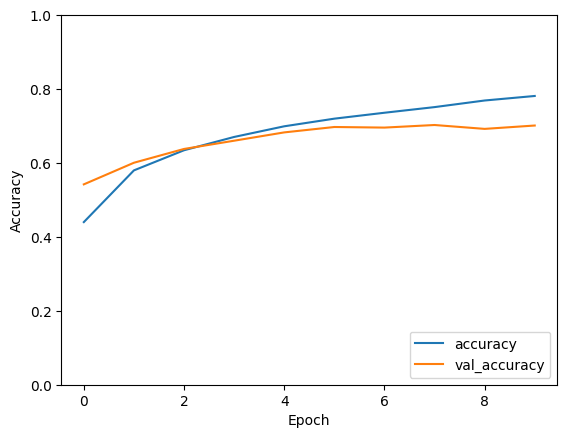

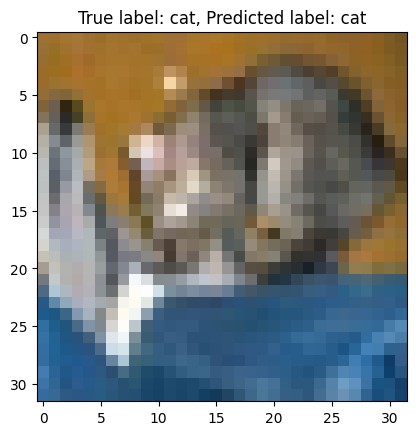

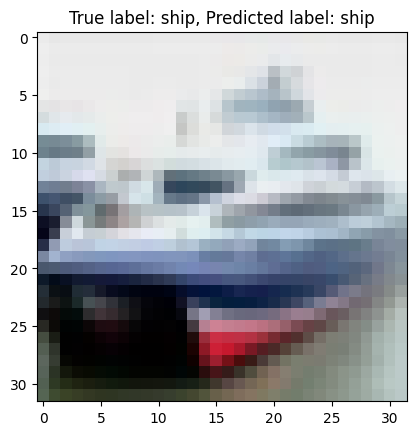

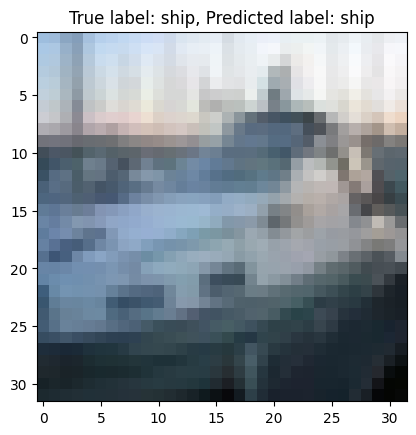

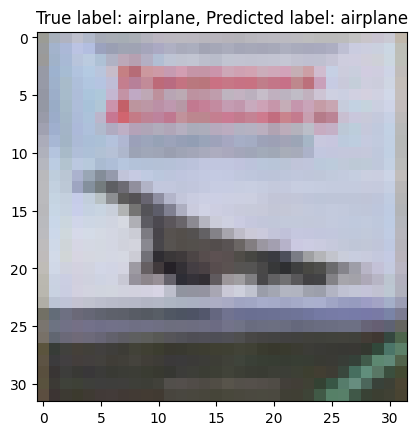

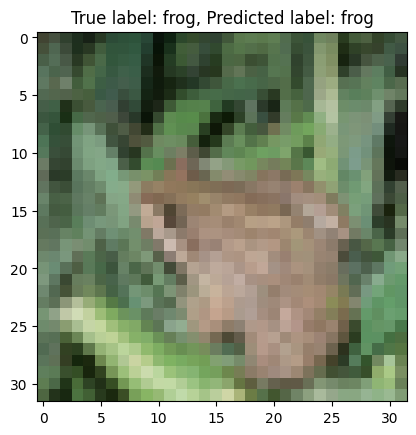

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Visualize some predictions
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"True label: {class_names[y_test[i][0]]}, Predicted label: {class_names[tf.argmax(predictions[i])]}")
    plt.show()

# Mobile Deployment

### Convert the TensorFlow Model to TensorFlow Lite

TensorFlow Lite is a lightweight version of TensorFlow designed for mobile and edge devices. Convert our trained model to TensorFlow Lite format using the TensorFlow Lite Converter. In our Python script or Jupyter Notebook, add the following code to convert the model:

In [13]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\mneme\AppData\Local\Temp\tmpvmklo5cf\assets


INFO:tensorflow:Assets written to: C:\Users\mneme\AppData\Local\Temp\tmpvmklo5cf\assets


Use the model.tflite file for developing android application